In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_profiling

In [37]:
from sklearn.linear_model import LinearRegression
import sklearn

In [36]:
forest = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [3]:
forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
forest.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0


In [6]:
forest.tail(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [7]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
forest.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [10]:
pandas_profiling.ProfileReport(forest)

In [12]:
forest.duplicated().describe()

count       517
unique        2
top       False
freq        513
dtype: object

In [13]:
forest.duplicated().sum()

4

In [15]:
forest[forest.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


In [16]:
forest.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


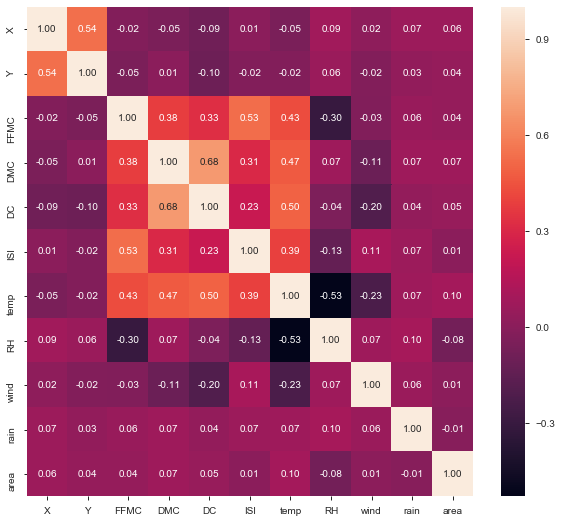

In [24]:
plt.figure(figsize=(10,9))
sns.heatmap(forest.corr(),annot=True,fmt='.2f')

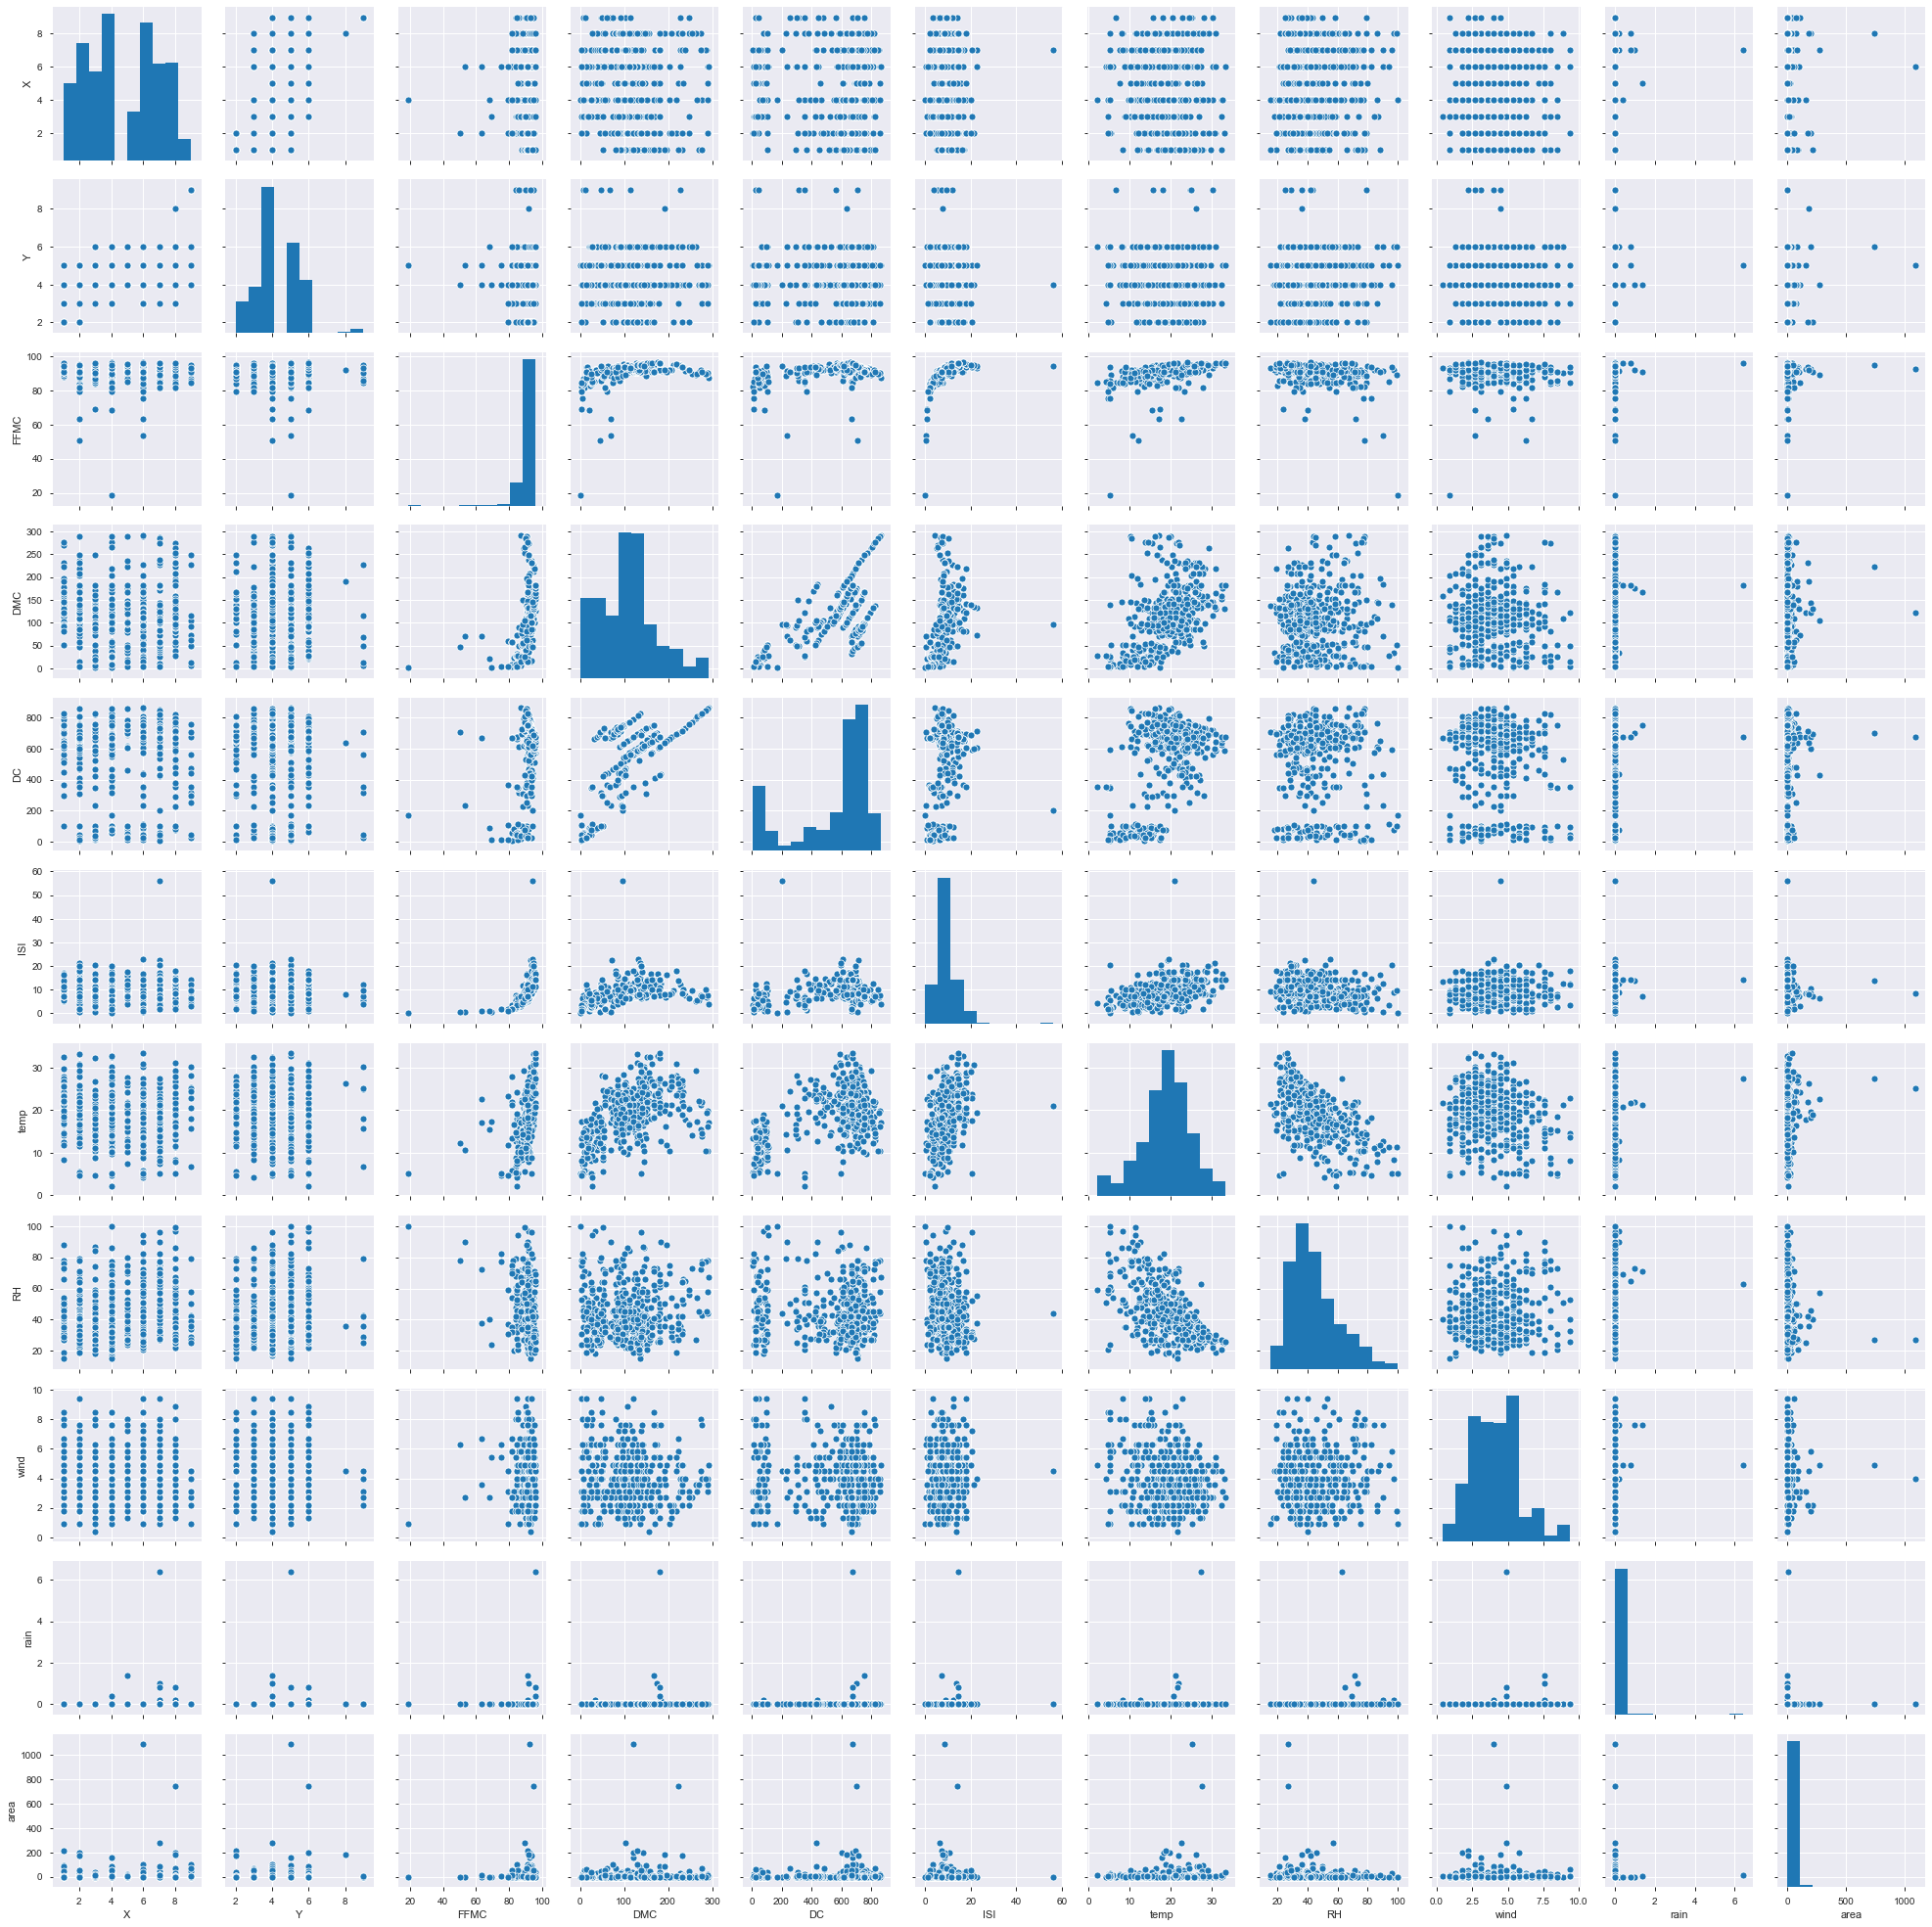

In [26]:
sns.pairplot(forest)

In [42]:
x= forest.drop(['area','month','day'],axis=1)

In [43]:
x.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0


In [44]:
y = forest['area']

In [45]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [46]:
mlr = LinearRegression()

In [47]:
mlr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
mlr.coef_

array([ 1.90794524e+00,  5.69180991e-01, -3.91995160e-02,  7.73345196e-02,
       -3.29461471e-03, -7.13739029e-01,  8.00212731e-01, -2.30644773e-01,
        1.55743147e+00, -3.40403700e+00])

In [50]:
mlr.intercept_

-6.369314768574503

In [52]:
mlr.score(x,y)

0.021639831514046137

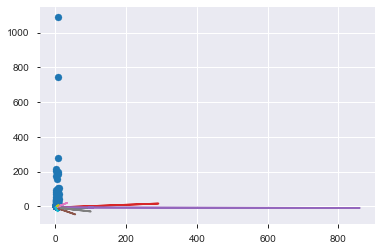

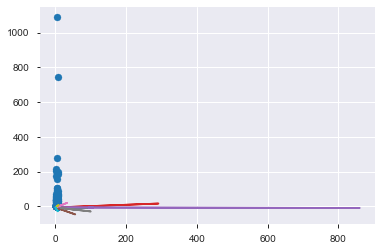

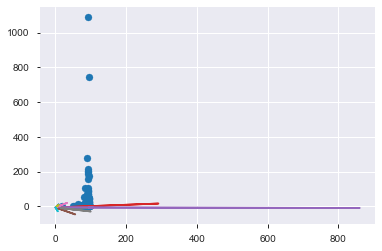

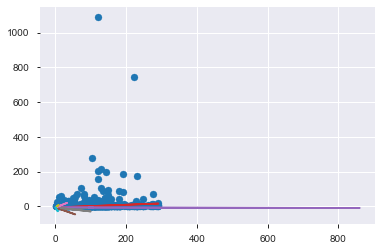

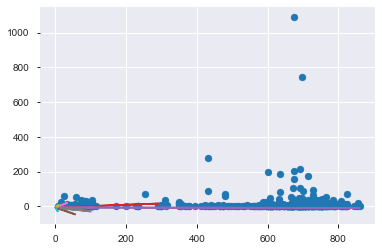

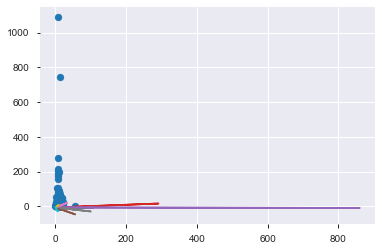

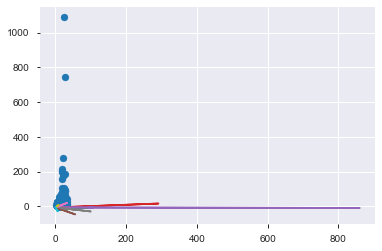

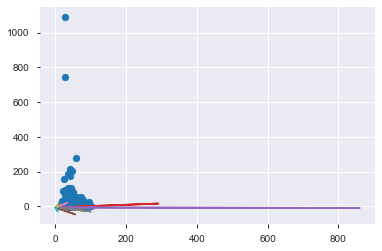

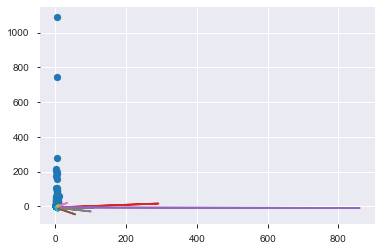

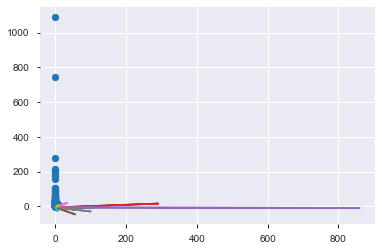

In [55]:
for i in x.columns:
    plt.scatter(x[i],y)
    plt.plot(x, mlr.intercept_ + mlr.coef_*x)
    plt.show()

# Training and Testing

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
x.shape

(517, 10)

In [59]:
y.shape

(517,)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [61]:
x_train.shape , x_test.shape ,y_train.shape , y_test.shape

((387, 10), (130, 10), (387,), (130,))

In [63]:
train_data = pd.DataFrame(x_train)
train_data.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
411,7,4,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0
467,3,4,90.2,18.5,41.1,7.3,11.2,41,5.4,0.0
365,6,5,91.9,111.7,770.3,6.5,19.6,45,3.1,0.0


In [65]:
train_data['area'] = y_train
train_data.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
411,7,4,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62
467,3,4,90.2,18.5,41.1,7.3,11.2,41,5.4,0.0,5.55
365,6,5,91.9,111.7,770.3,6.5,19.6,45,3.1,0.0,20.03


In [67]:
test_data = pd.DataFrame(x_test)
test_data.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
195,2,5,93.9,135.7,586.7,15.1,23.5,36,5.4,0.0
135,3,5,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0
91,8,6,91.7,35.8,80.8,7.8,17.4,24,5.4,0.0


In [68]:
test_data['area'] = y_test
test_data.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
195,2,5,93.9,135.7,586.7,15.1,23.5,36,5.4,0.0,10.02
135,3,5,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00
91,8,6,91.7,35.8,80.8,7.8,17.4,24,5.4,0.0,0.00


In [69]:
Model = LinearRegression()

In [70]:
Model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
Model.score(x_train,y_train)

1.0

In [72]:
Model.score(x_test,y_test)

1.0

In [73]:
new_pred = Model.predict(x_test)
new_pred

array([ 1.00200000e+01,  2.98062944e-13, -3.40260239e-12,  2.18000000e+00,
       -1.82411342e-12,  1.72000000e+00, -3.22791662e-12,  5.83000000e+01,
        6.00514099e-13,  3.30000000e-01,  3.35000000e+00,  1.63300000e+01,
        4.42000000e+00,  6.70161973e-13, -6.95376184e-13,  7.46280000e+02,
        8.11514284e-13,  3.33000000e+00,  8.02000000e+00,  2.20300000e+01,
       -3.25045588e-12,  1.76000000e+00,  1.18659685e-12,  9.51800000e+01,
        1.21036696e-12,  6.11300000e+01,  1.42900000e+01,  1.10503098e-12,
        1.36608139e-12,  8.86424945e-13,  7.03200000e+01, -3.36461713e-12,
        1.46800000e+01, -3.82318517e-12,  1.05212978e-12,  1.25181390e-12,
        2.23811012e-12,  1.08200000e+01,  1.29192512e-13,  9.50000000e-01,
        5.42900000e+01, -3.25191641e-12,  6.43000000e+00,  1.03161177e-12,
        1.00573472e-12,  8.71000000e+00,  2.47000000e+00, -3.31261631e-12,
       -3.40038987e-12,  7.10000000e-01,  3.91993006e-13, -3.42850431e-12,
        1.47000000e+00,  

In [74]:
from sklearn import metrics

In [75]:
result = pd.DataFrame({'Actual_data':y_test,
                      'New_prediction_data':new_pred})
result

,Actual_data,New_prediction_data
195,10.02,1.002000e+01
135,0.00,2.980629e-13
91,0.00,-3.402602e-12
343,2.18,2.180000e+00
300,0.00,-1.824113e-12
...,...,...
475,3.19,3.190000e+00
186,7.19,7.190000e+00
132,0.00,-3.218812e-12
220,32.07,3.207000e+01


In [76]:
print('MAE',metrics.mean_absolute_error(y_test,new_pred))

MAE 1.497945060939521e-12


In [77]:
print("Mean Square Error", metrics.mean_squared_error(y_test,new_pred))

Mean Square Error 3.4305599008000364e-24


In [78]:
print("Root Mean Square Error ",np.sqrt(metrics.mean_squared_error(y_test,new_pred)))

Root Mean Square Error  1.852177070584785e-12
